# Student Performance Indicator 

### Life Cycle Of ML Project

1) Understanding the problem statement
2) Data Collection
3) Data checks to perform
4) Exploratory data analysis
5) Data Pre-processing
6) Model Training
7) Choosing Best model

### 1) Problem Statement

This project understands how the students performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, lunch and test preparation course.


### 2) Data Collection

In [64]:
## Importing Data and required liberaries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('data/student.csv')

In [66]:
df.head()  ## Showing top 5 records 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
df.shape

(1000, 8)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Dataset Information

1) Gender : Sex of students -> (male/female)
2) race/ethnicity - ethnicity of students -> (Group A, B, C, D, E)
3) Parental level of education : Parents final Education
4) lunch : having lunch before test (standard or free/reduced)
5) test preparation course : Complete or not complete before test
6) math score 
7) reading score
8) writing score


### 3) Data Checks

1) Check Missing values
2) Check Duplicates
3) Check data type
4) Check the number of unique values of each column
5) chack statistics of datasets
6) check various categories present in the different categorical columns



In [69]:
## 1) Checking missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset. 

In [70]:
## 2) Checking Duplicates

df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

In [71]:
## 3) Checking number of unique values in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [72]:
## Checking number of unique values in each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [73]:
## Checking Statistics of dataset

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

1) From above description of numerical data, all means are close to each other 
2) All standard deviations are close
3) While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading more higher = 17

### Exploring data


In [74]:
print('Categories in gender variable:    ', end =' ')
print(df['gender'].unique())

print('categories in race/ethnicity variable:   ',end = ' ')
print(df['race/ethnicity'].unique())

print('categories in parental level of education variable: ', end = '  ')
print(df['parental level of education'].unique())

print('categories in lunch variable  ', end =' ')
print(df['lunch'].unique())

print('categories in test preparation course variable ',end =' ')
print(df['test preparation course'].unique())



Categories in gender variable:     ['female' 'male']
categories in race/ethnicity variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable   ['standard' 'free/reduced']
categories in test preparation course variable  ['none' 'completed']


In [75]:
## Define numerical and categorical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features i.e. : {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features i.e. : " {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features i.e. : ['math score', 'reading score', 'writing score']
we have 5 categorical features i.e. : " ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [76]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [77]:
## Creating total score and average for our output feature.

df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['average score'] = df['Total_score']/3

In [78]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
## Students with full marks 

reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in maths : {math_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with full marks in reading : {reading_full}')

Number of students with full marks in maths : 7
Number of students with full marks in writing : 14
Number of students with full marks in reading : 17


In [80]:
## Students with less than 20 marks

reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in maths : {math_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in reading : {reading_less_20}')

Number of students with less than 20 marks in maths : 4
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in reading : 1


#### Insights

1) From above values we get students have performed the worst in maths.
2) Best performance is in reading section


### 4) EXploratory Data Analysis (Visualization)

##### 4.1) Visualize average score distribution to make some conclusion 

1) Histogram
2) Kernel density function (KDF)



<Figure size 1000x800 with 0 Axes>

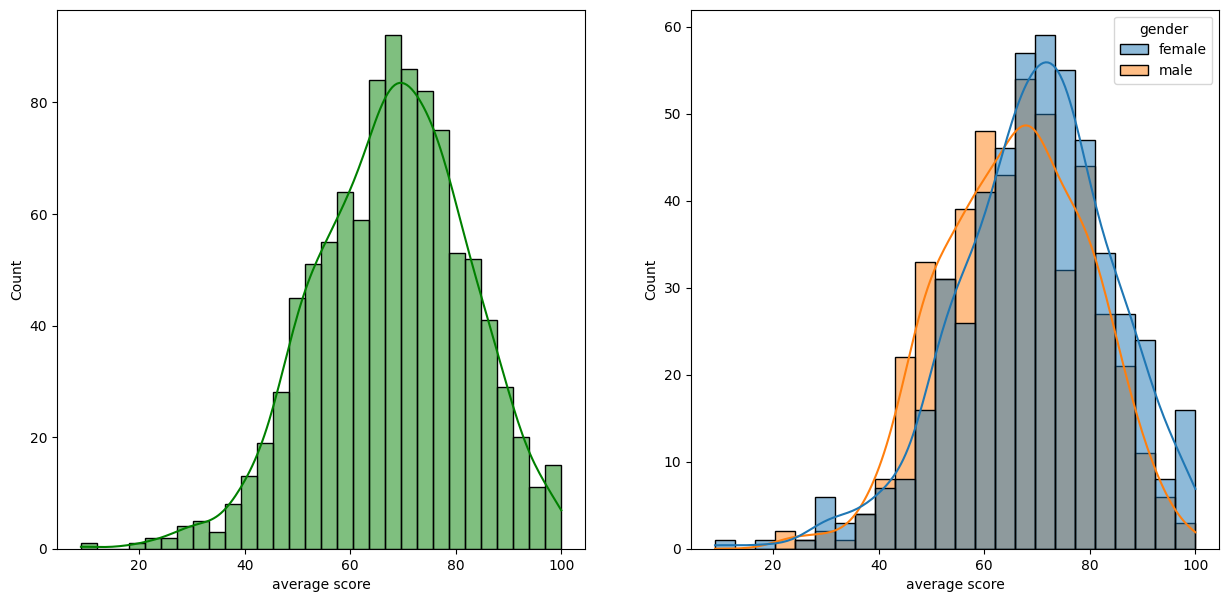

In [81]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'gender')
plt.show()

#### Insights

Female Students have performed well than male students. 

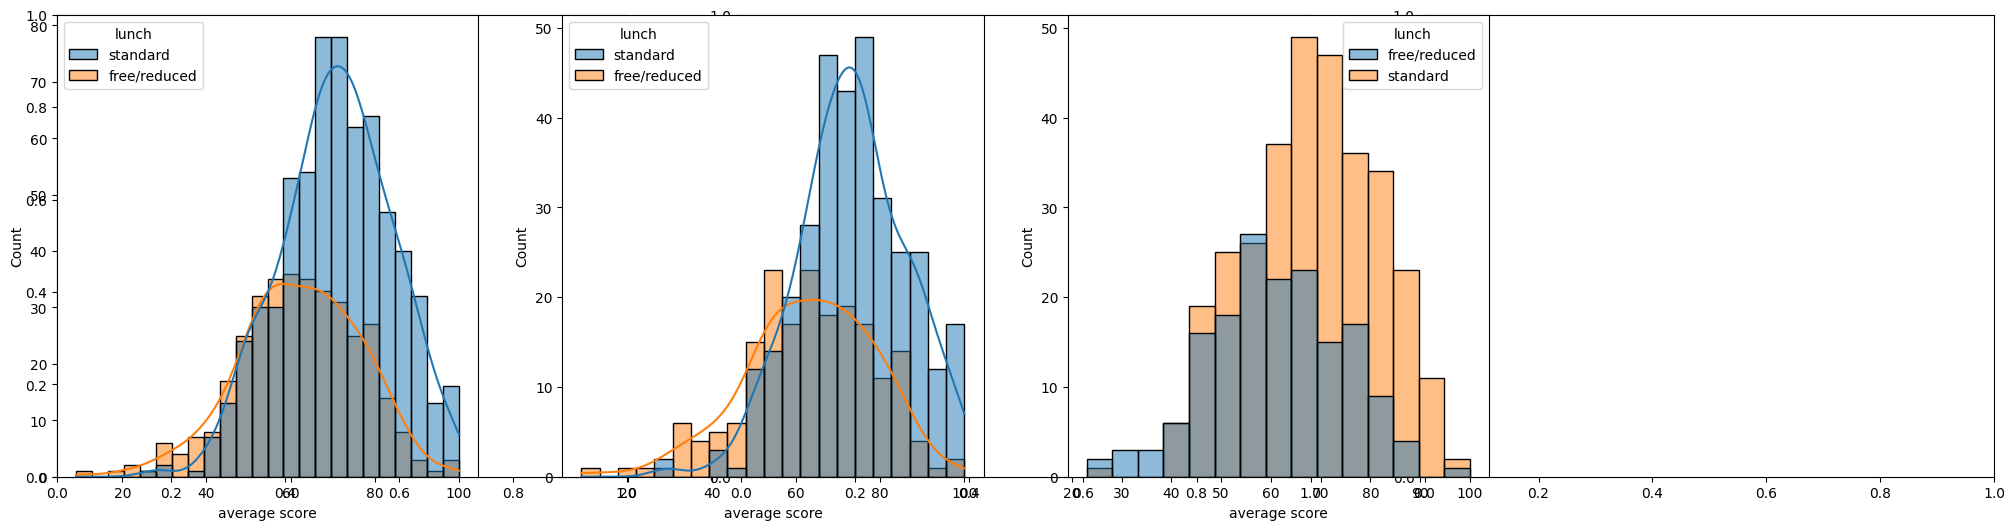

In [82]:
## Compairing average score with lunch

plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average score', kde =  True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average score', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average score', hue = 'lunch')
plt.show()

1) Standard lunch helps perform well in exams.
2) Standard lunch helps perform well in exams be it a male or a female. 

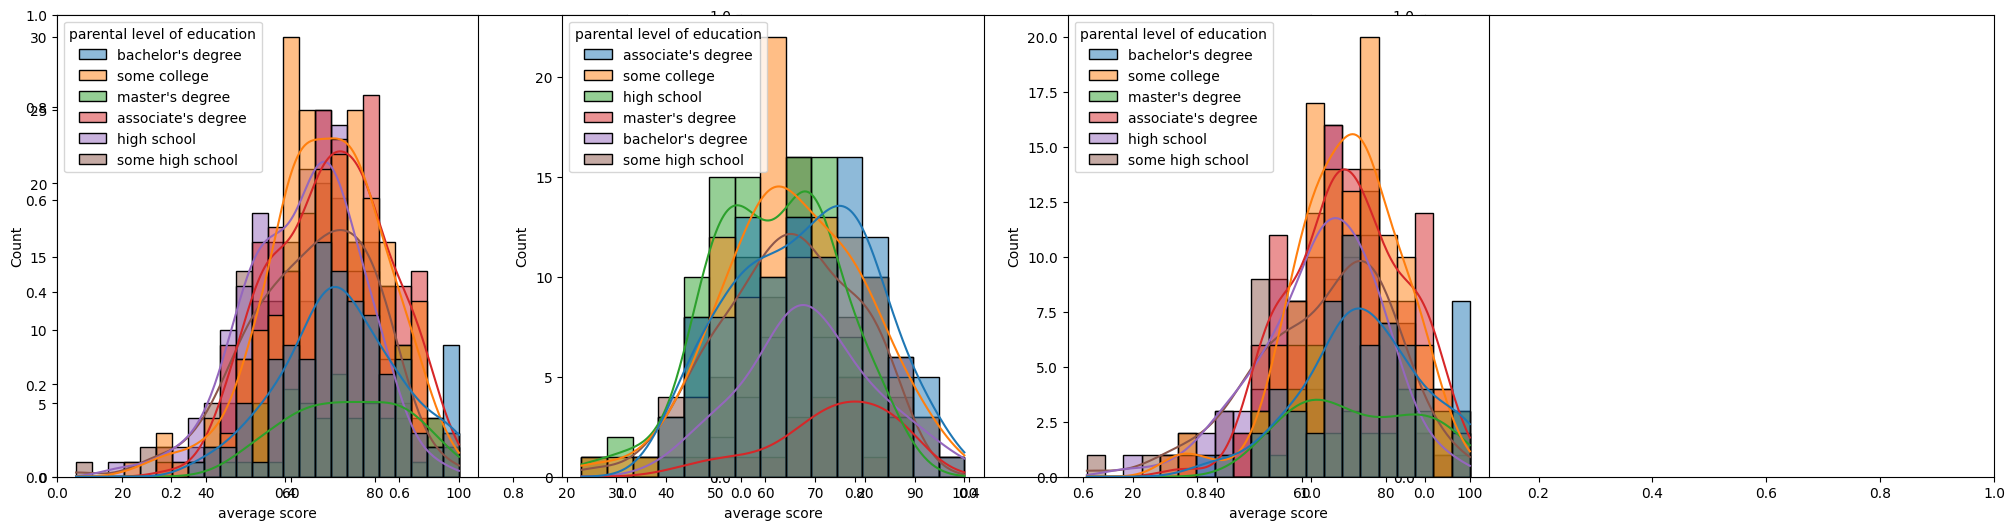

In [83]:
## Average score vs parental level of education

plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average score', kde = True, hue = 'parental level of education')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender=='male'], x = 'average score', kde = True, hue = 'parental level of education')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'], x = 'average score', kde = True, hue = 'parental level of education')
plt.show()

#### Insights

1) In general parent's education dont help students perform well in exam.
2) 2nd plot shows that parents whose education is associate degree or masters degree their male child tend to perform well in exam.
3) 3rd plot shows, there is no effect of parents education on female students

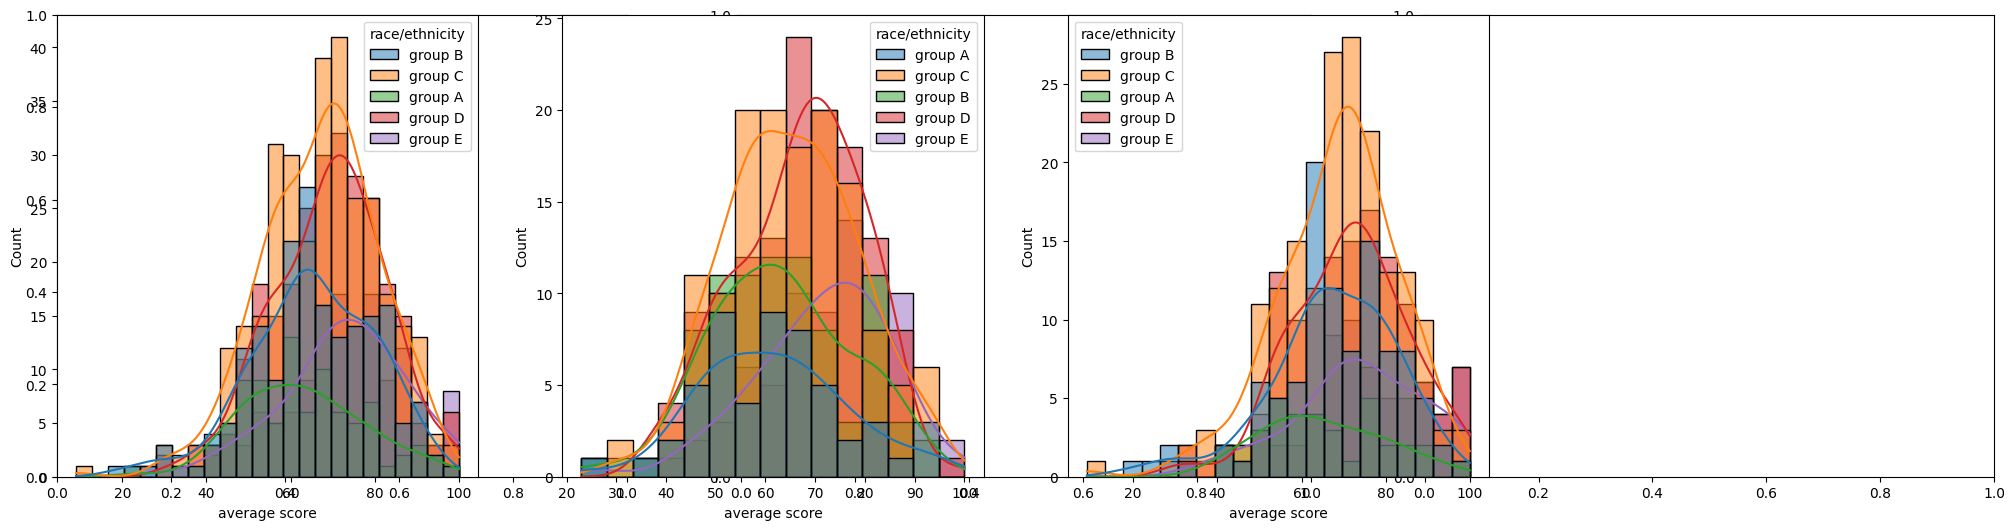

In [84]:
## Average score vs race/ethnicity

plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average score', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'average score', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender =='female'], x = 'average score', kde = True, hue = 'race/ethnicity')
plt.show()

#### Insights

1) Students of group A and B Tends to perform poorly in exam
2) Students of group A and B perform poorly in exam irrespective of whether they are male or female. 



## Maximum score of students in all three subjects

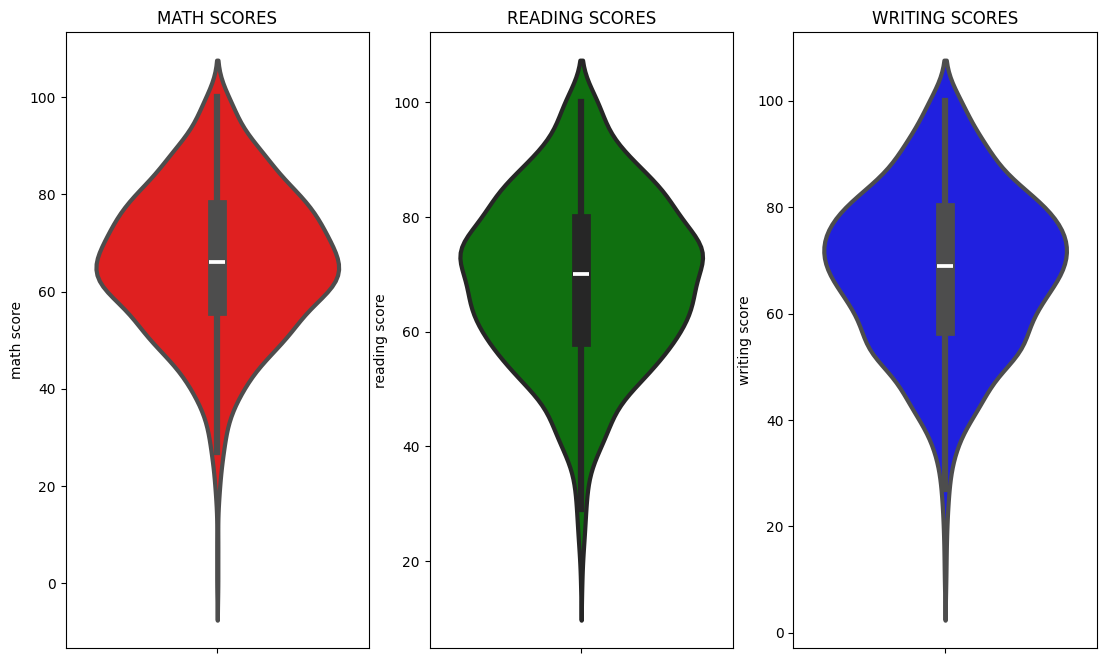

In [85]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From above violin plots, we can see that most of the students score between 60 - 80 in all three subjects. 


### Multivariate analysis using pieplot

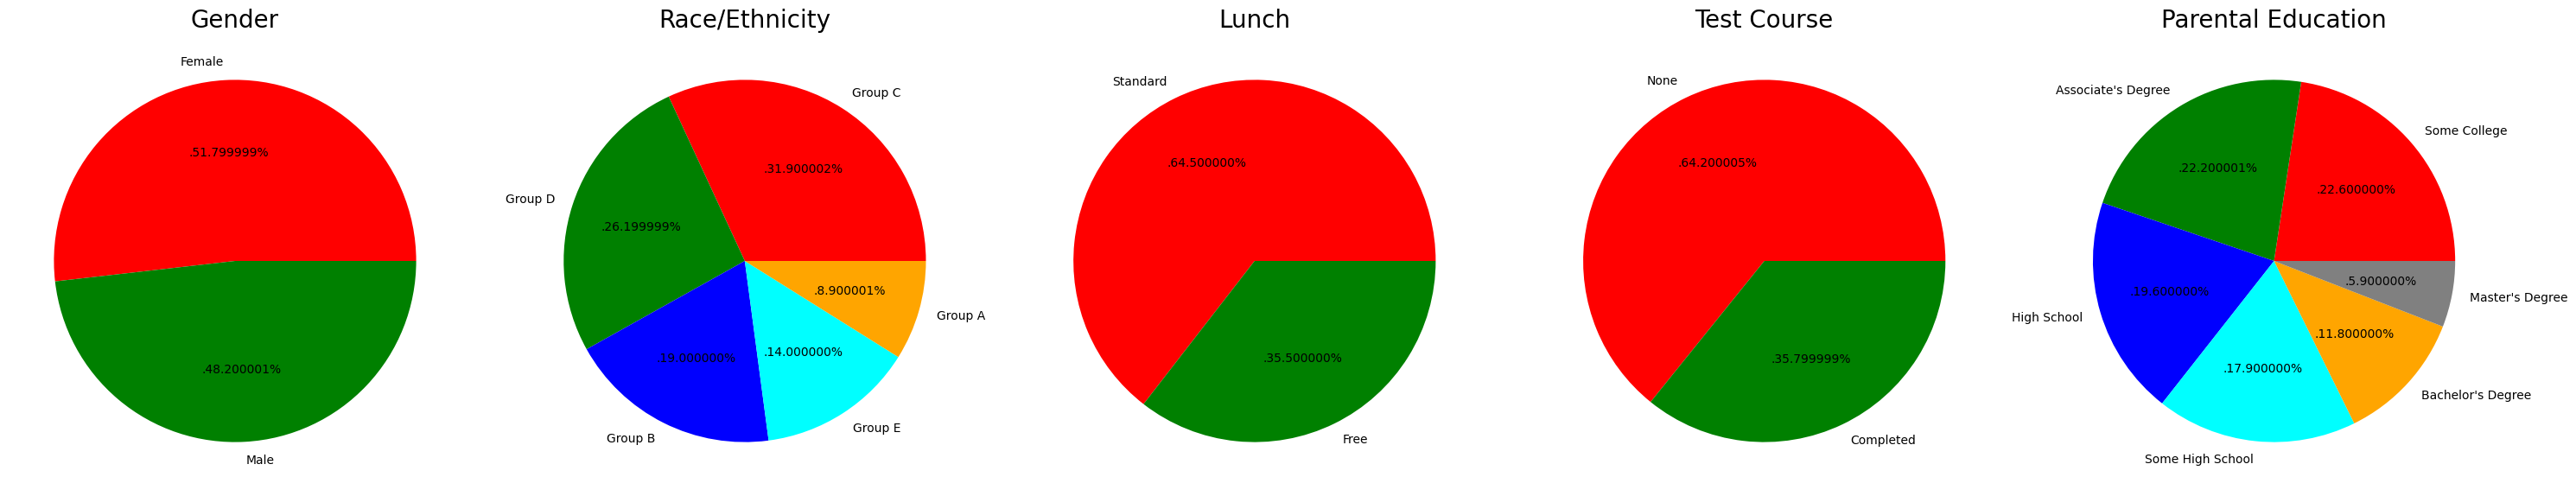

In [86]:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights

1) Number of male and female students is almost equal
2) Number of students are greatest in Group C.
3) Number of students who have standard lunch are greater. 
4) Number of students who have not enrolled in any test preparation course is greater. 
5) Number of students whose parental education in some college is greater followed closely by associate degree. 


## Feature Wise Visualization

### Gender column

1) Distribution of gender
2) Impact of gender on students performmance. 



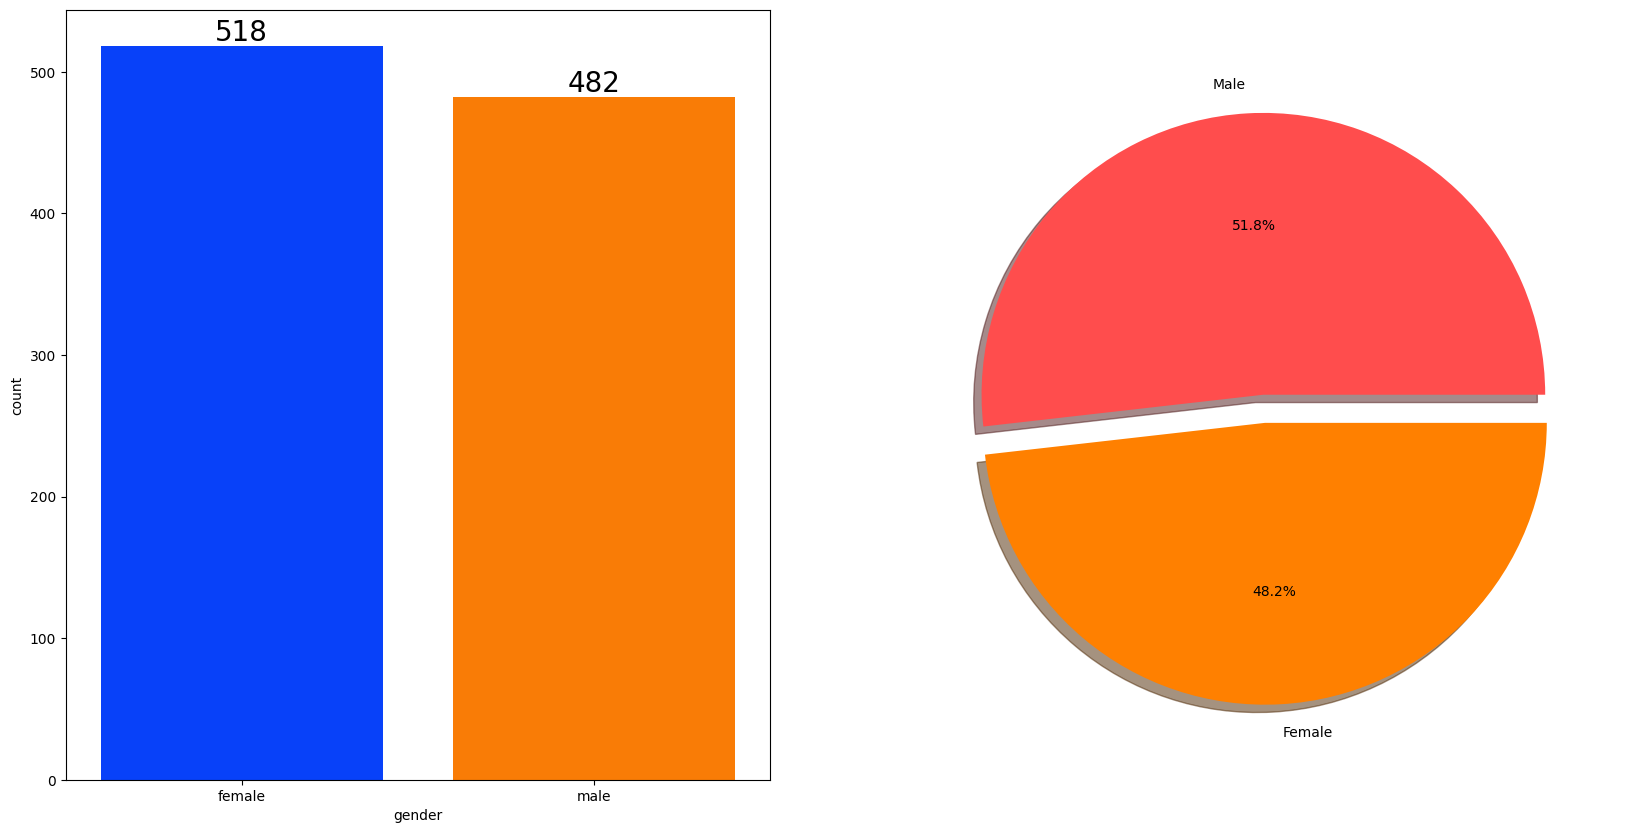

In [87]:
## Univariate Analysis (Distribution of gender)

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights

Gender has balanced data with female students are 518 (48%) and male students are 482(52%).



### Race/ethnicity column 

1) Group wise distribution
2) impact of race/ethnicity on performance. 


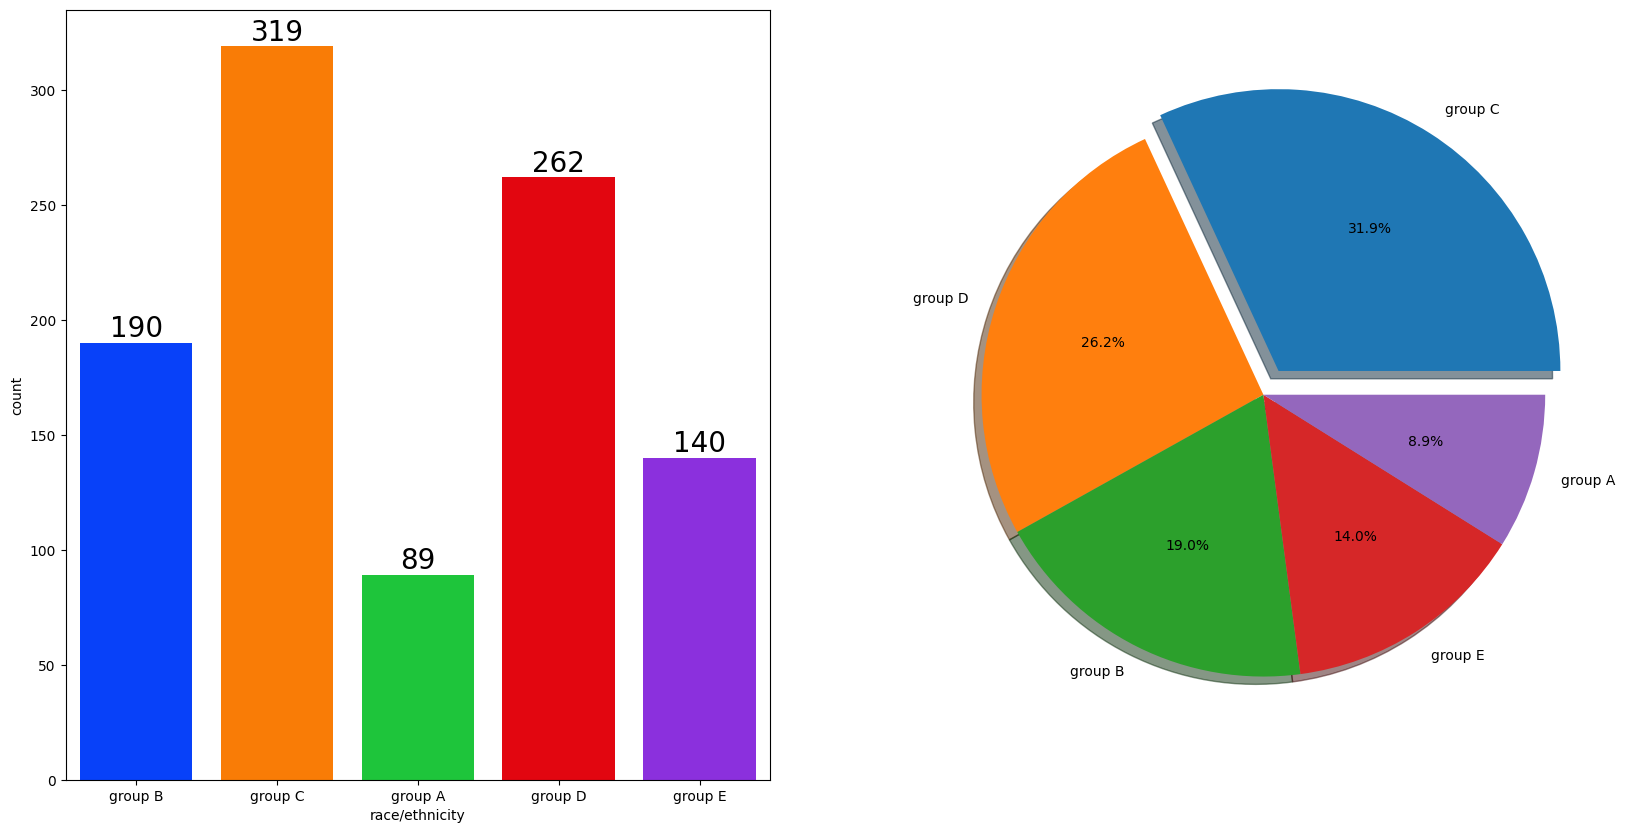

In [88]:
## Univariate analysis

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()


#### Insights 

1) Most of the students belonging from group C/group D
2) Lowest number of students belong to group A

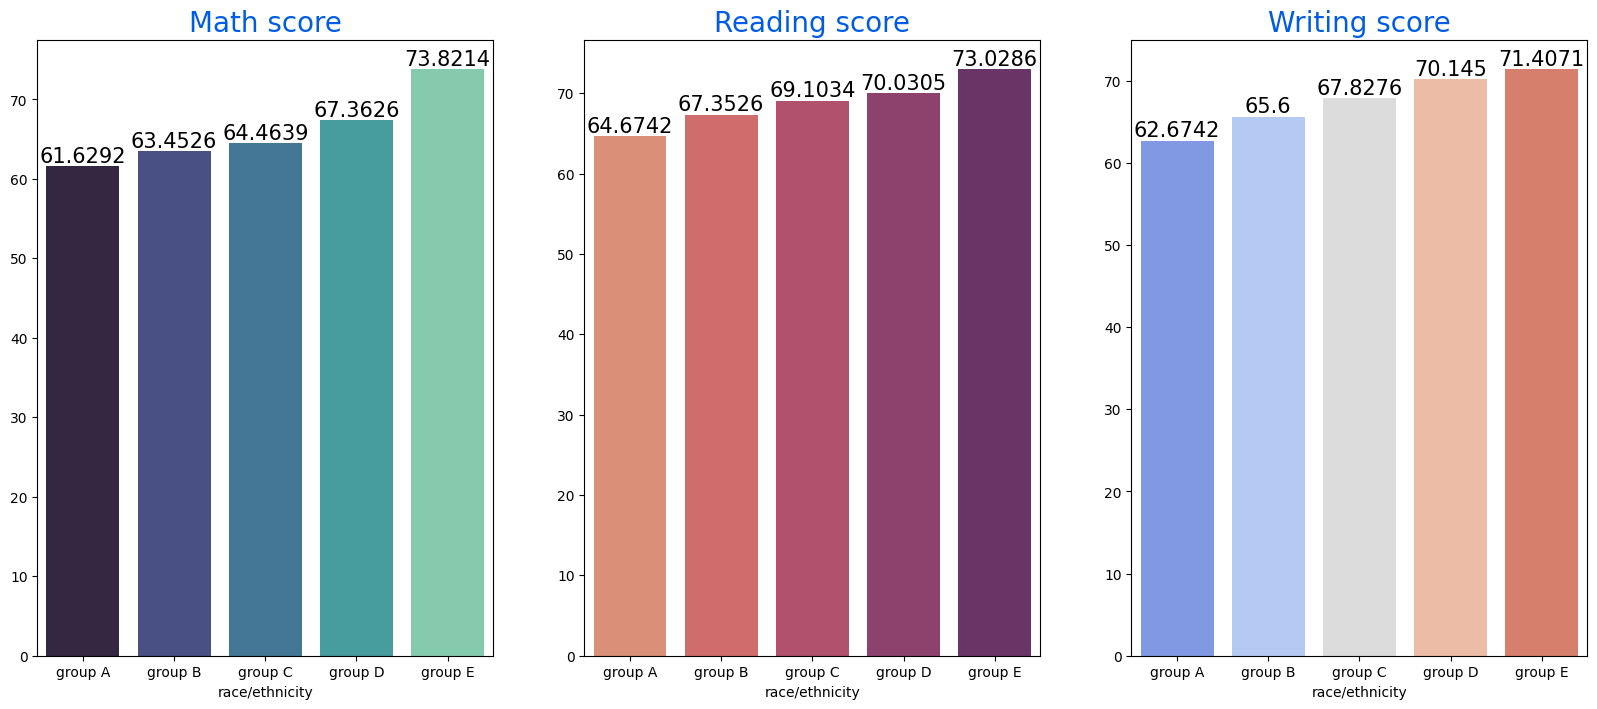

In [91]:
## Bivariate analysis

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
plt.show()    

#### Insights

1) Group E Students have scored highest marks
2) Group A students have scored The lowest marks
3) Students from lower Socioeconomic status have a lower average in all course subjects . 


### Parental level education column

1) Educational background of parents
2) Impact of parents education on students performance. 


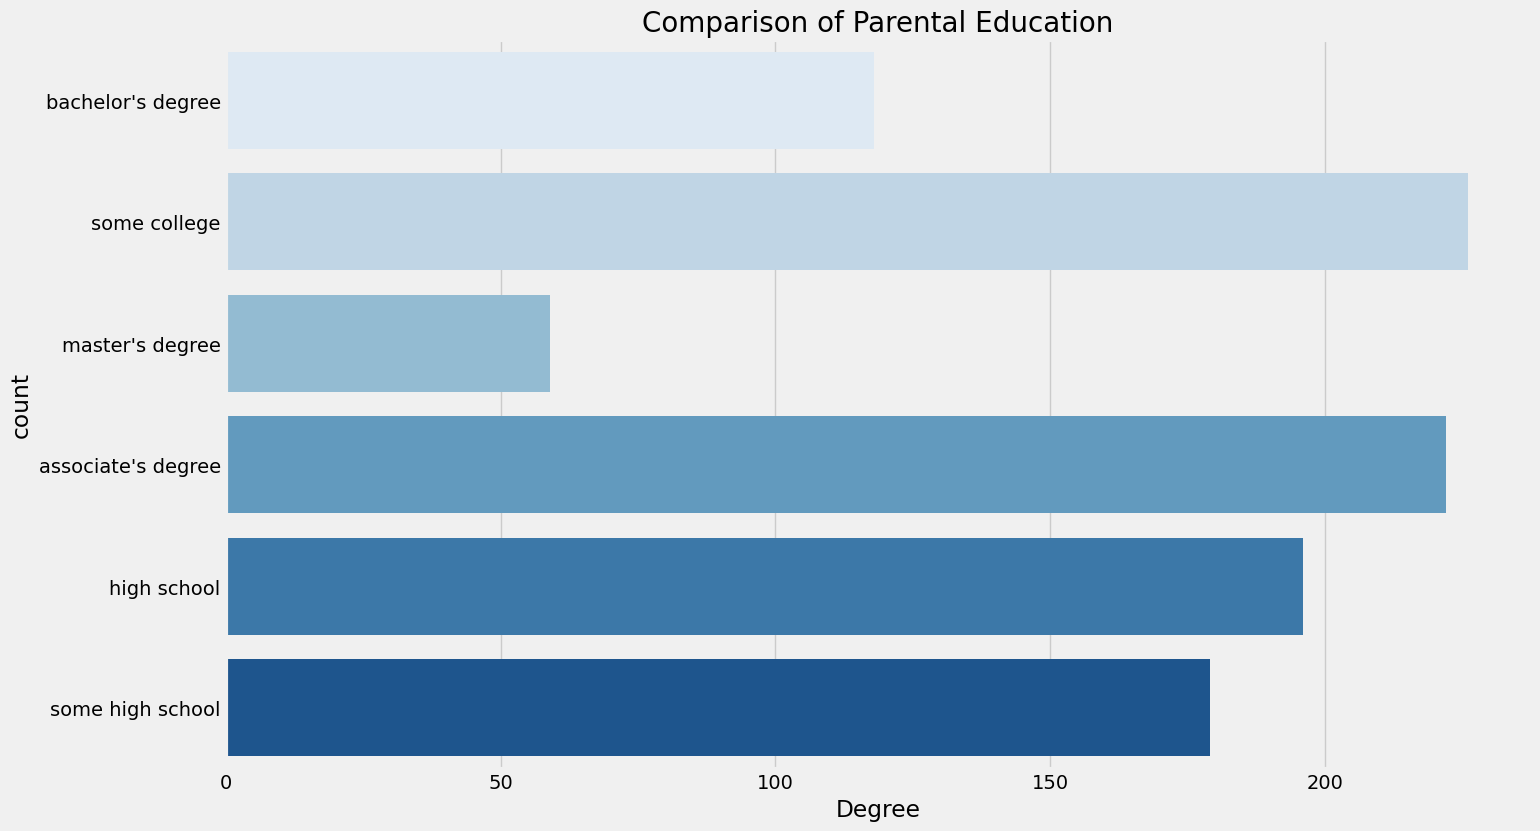

In [92]:
## Univariate analysis


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college.

### Lunch column 



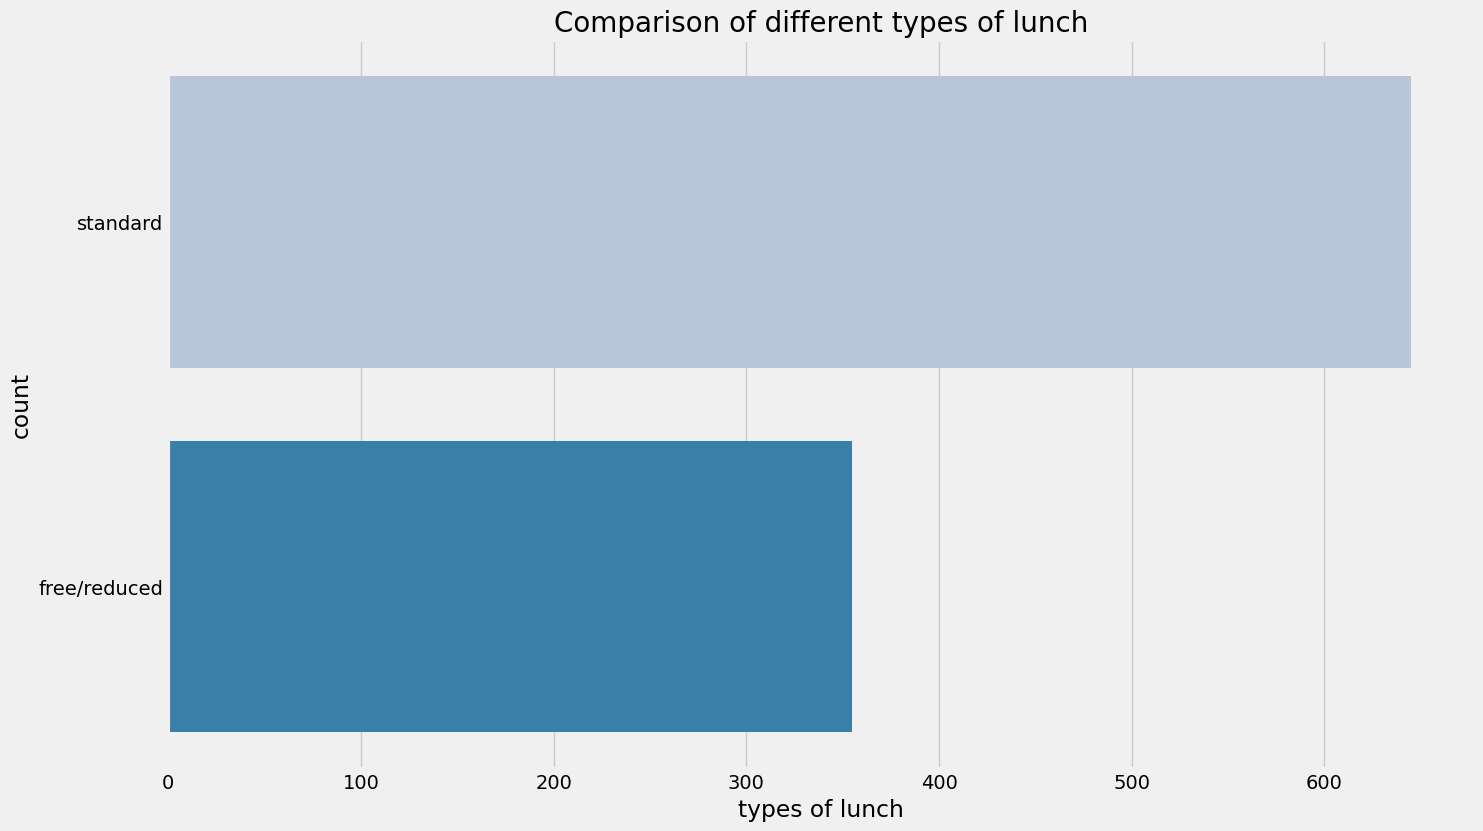

In [95]:
## Univariate 


plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Students being served standard lunch was more than free lunch.

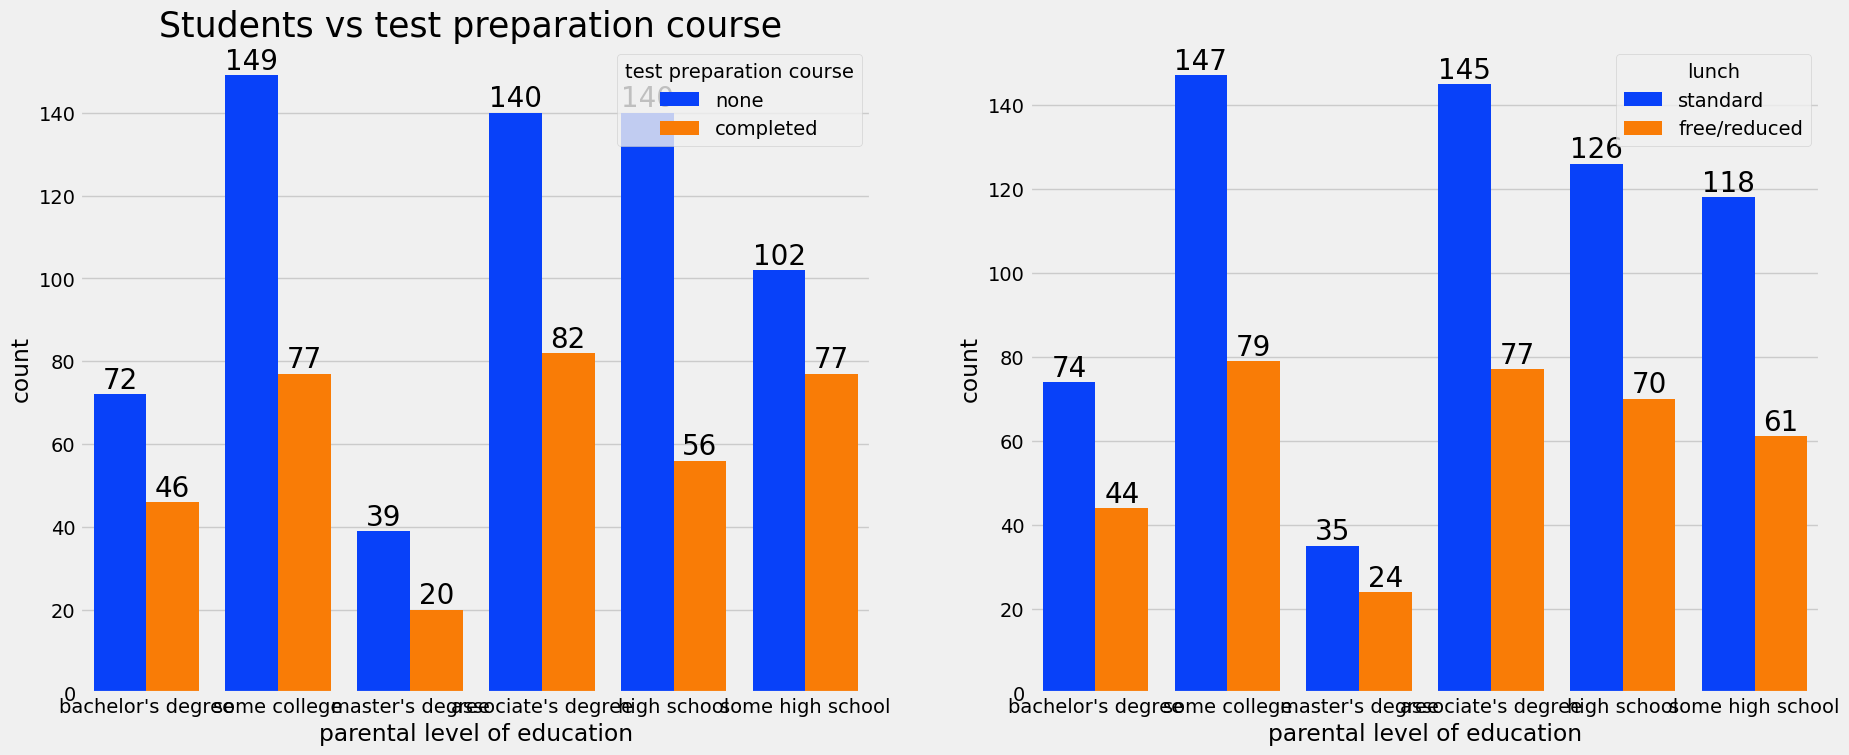

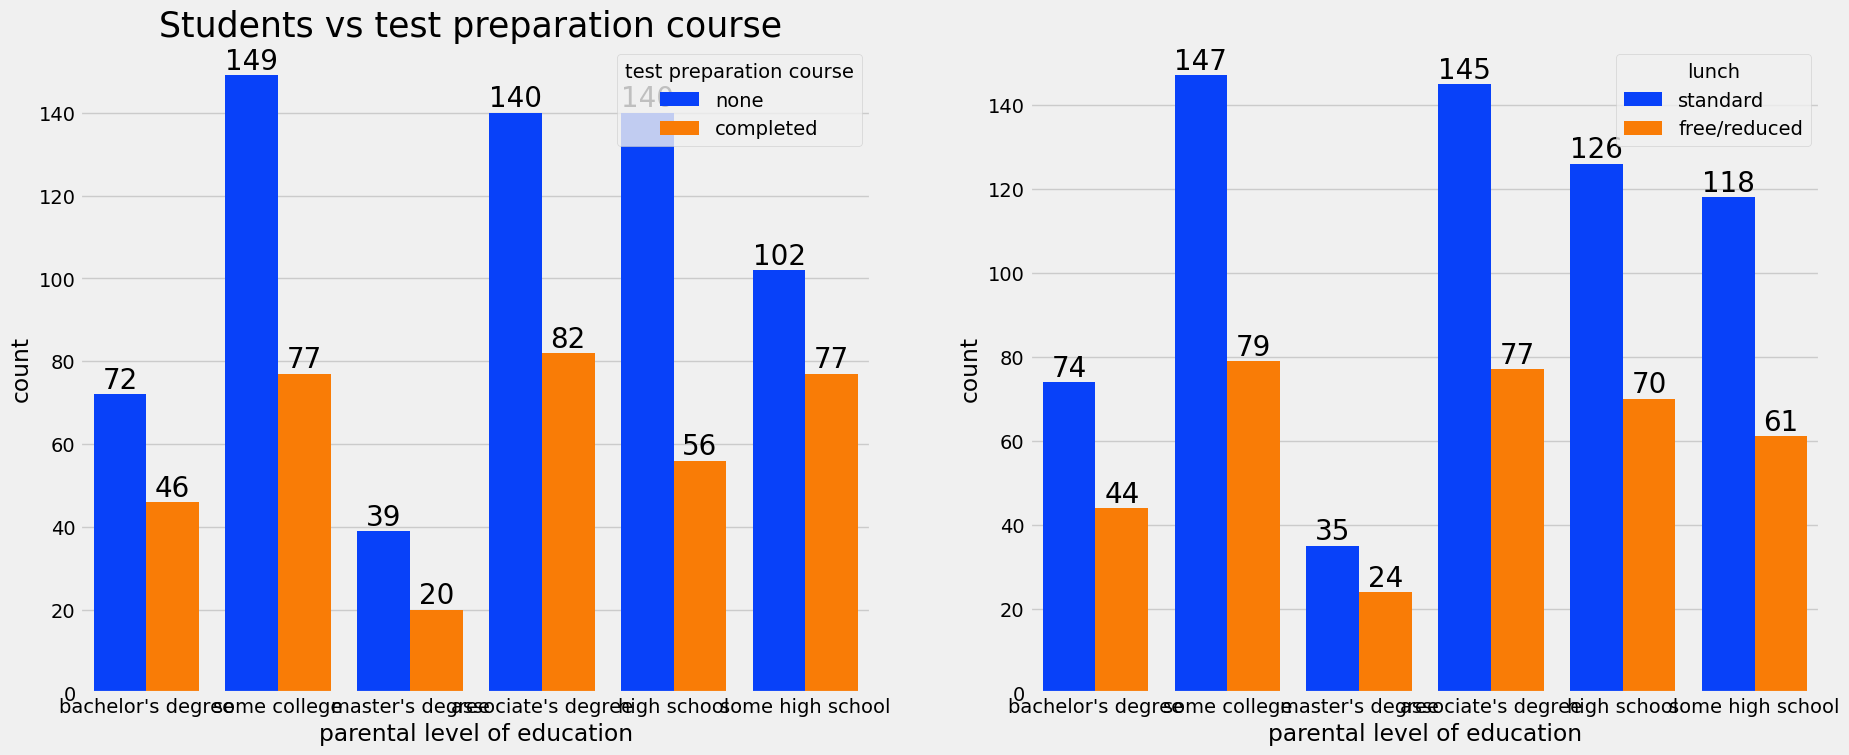

In [97]:
## Bivariate 

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  
    
plt.show()    

Students who get standard lunch tend to perform better than students who got free /reduced lunch. 


### Test preparation course column

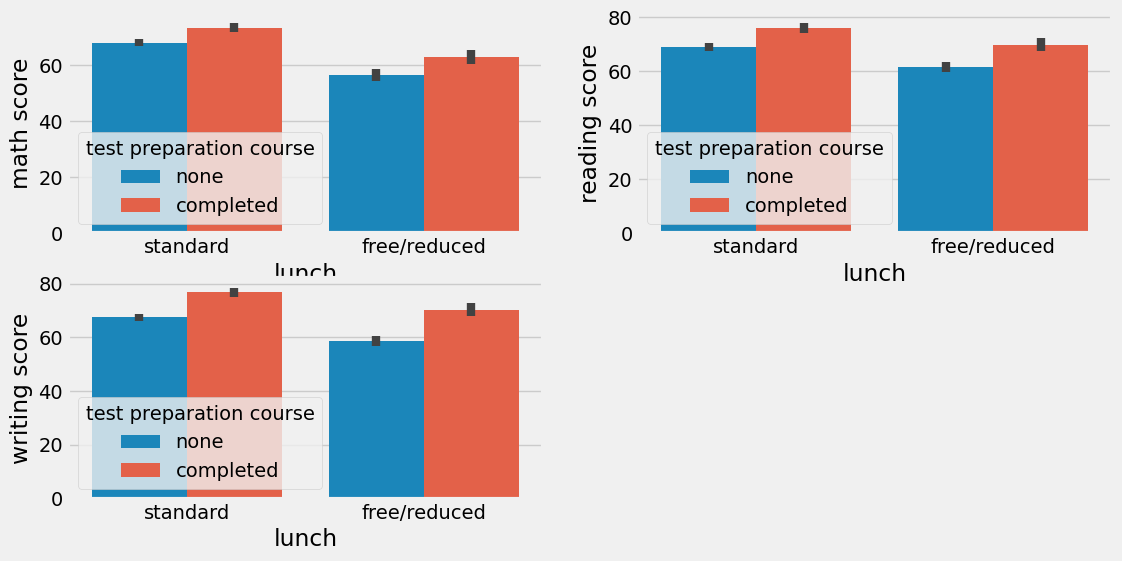

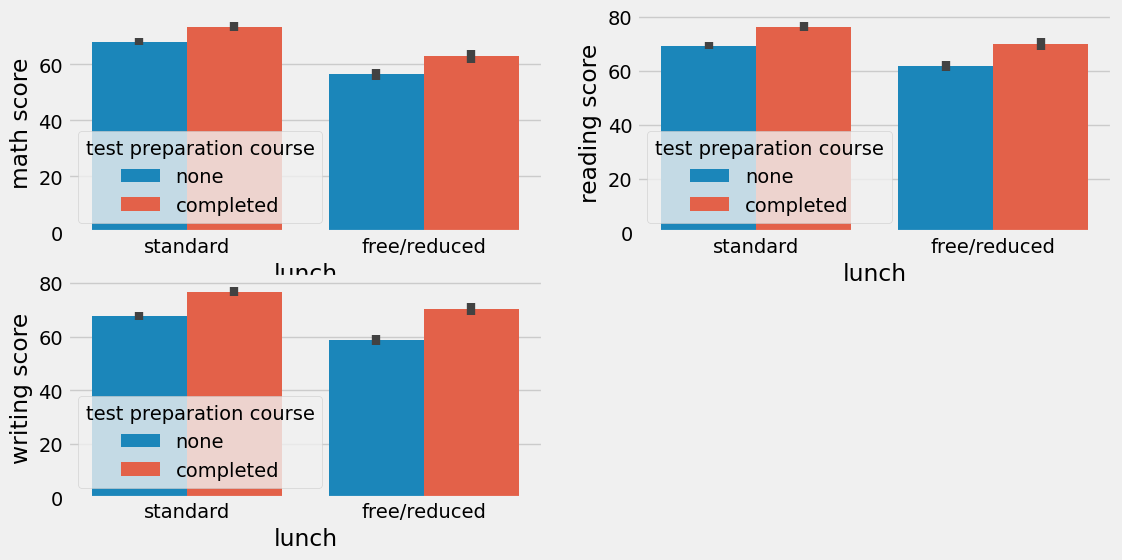

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

#### Insights

Students who have completed the test preparation course have scores higher in all three categories than those who havent taken the course. 


## Checking outliers


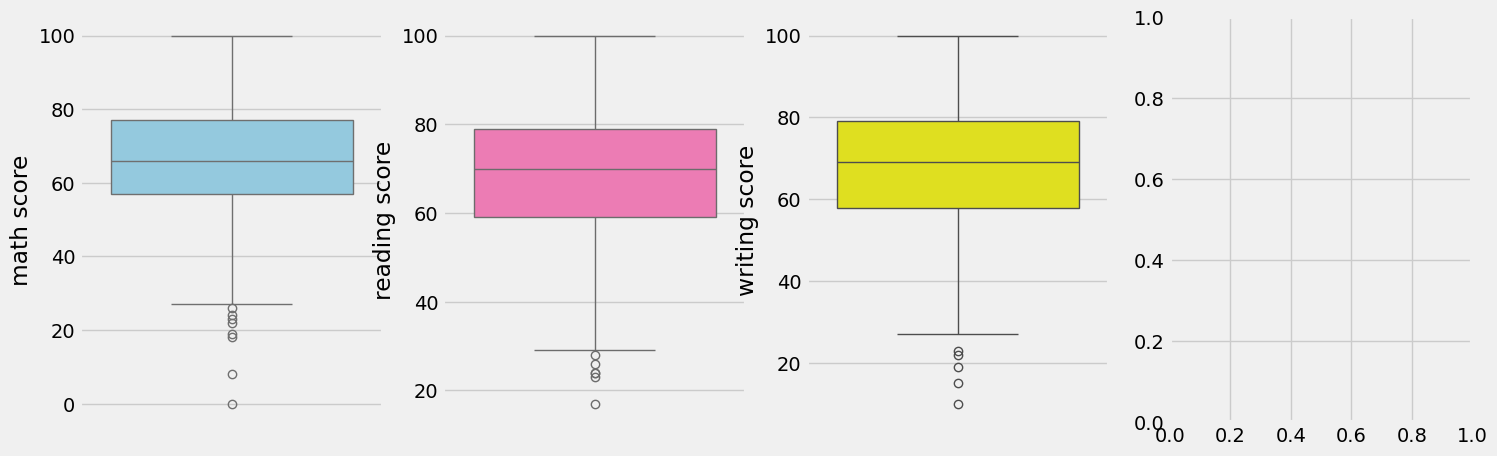

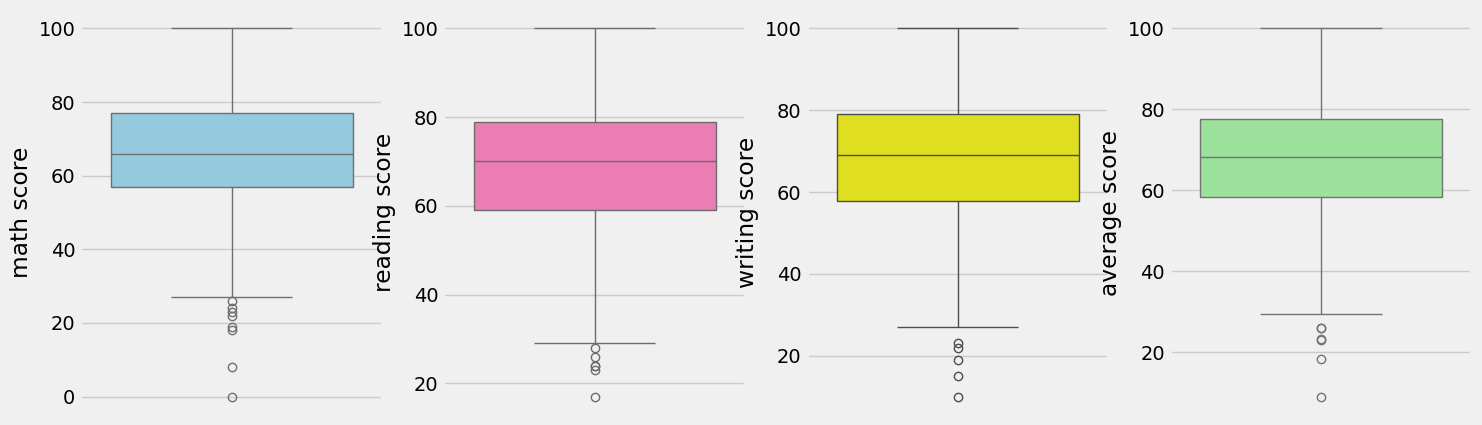

In [101]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

#### Multivariate analysis using pairplot



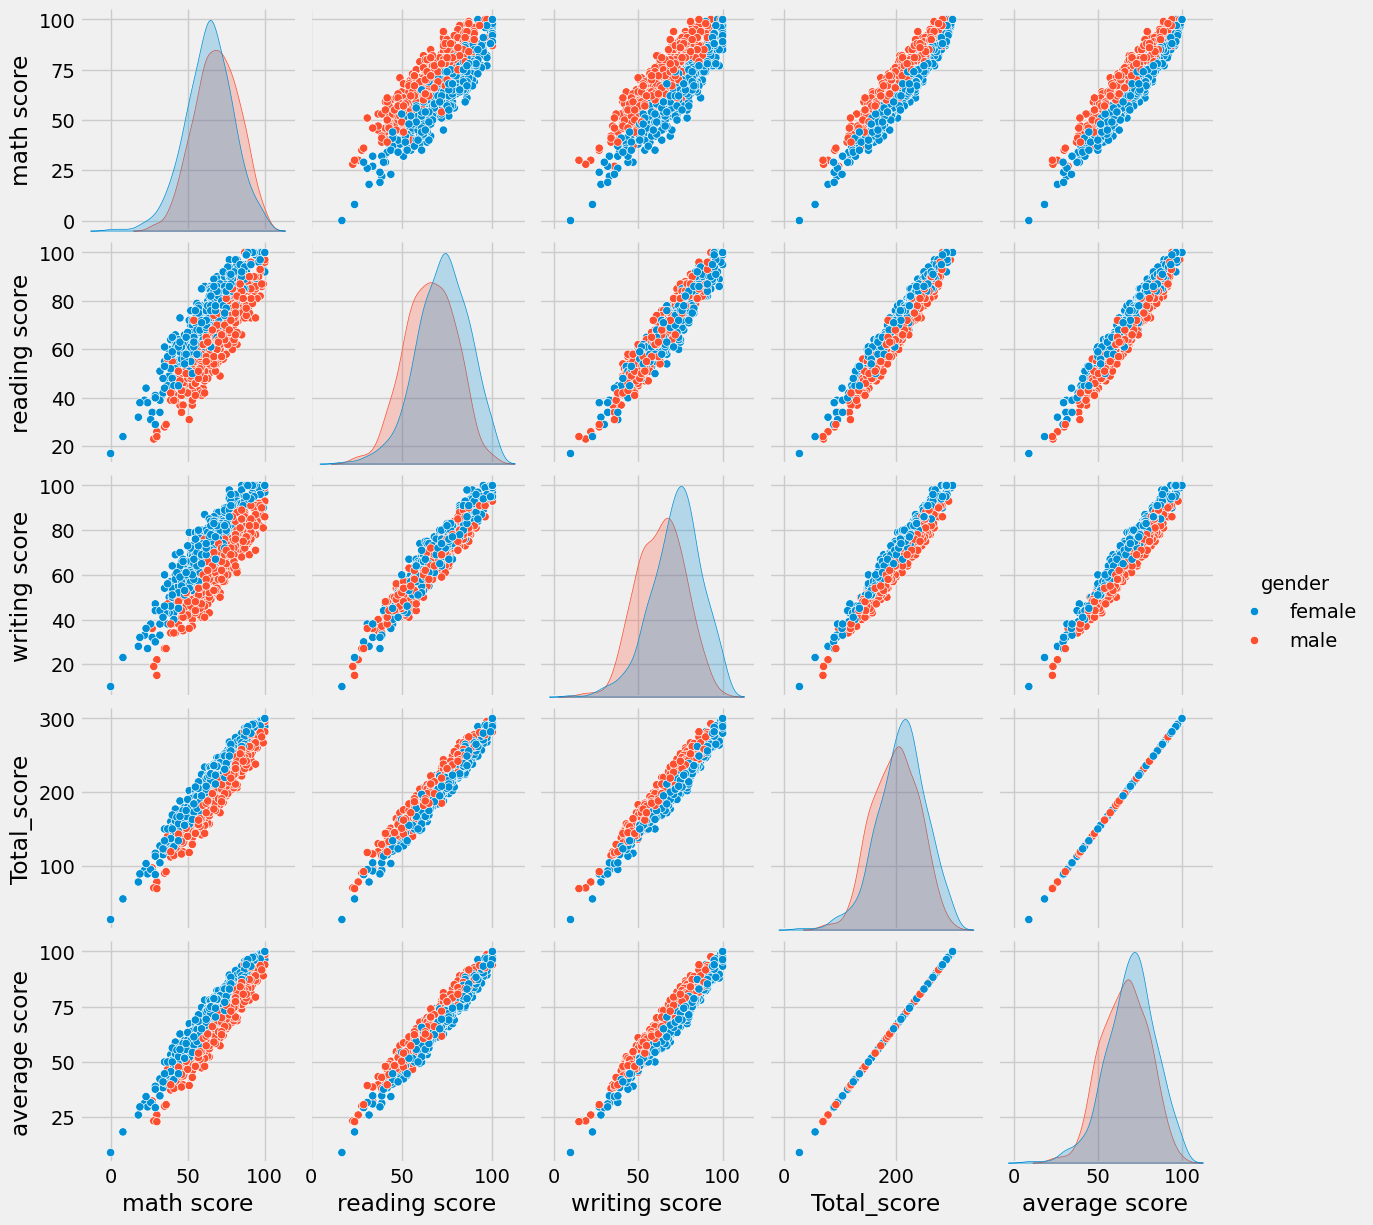

In [102]:

sns.pairplot(df,hue = 'gender')
plt.show()

From above plot it is clear that all the scores increase linearly with each other. 



# Conclusions

1) Students performance is related with lunch, race, parental level education
2) Females lead in pass percentage and also are top scorers. 
3) Students performance is not much related with test preparation course. 
4) Finishing preparation course is beneficial. 
